In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns',None)
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", 
          "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
          "#bcbd22", "#17becf"]
# will display all the cols
# None means show as many as they are , none should be left
#  'display.max_rows' will display all the rows 

In [2]:
dataset = pd.read_csv('train.csv')
# print(dataset)
# no of rows * no of cols
print(dataset.shape)

(1460, 81)


## Missing Values

In [3]:
# here we will check the percentage of nan values in each feature
# step1 -make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
#step 2 - print the feature name and the percentage of missing value
for feature in features_with_na:
    print(feature,np.round(dataset[feature].isnull().mean(),4), '% missing value')

LotFrontage 0.1774 % missing value
Alley 0.9377 % missing value
MasVnrType 0.5973 % missing value
MasVnrArea 0.0055 % missing value
BsmtQual 0.0253 % missing value
BsmtCond 0.0253 % missing value
BsmtExposure 0.026 % missing value
BsmtFinType1 0.0253 % missing value
BsmtFinType2 0.026 % missing value
FireplaceQu 0.4726 % missing value
GarageType 0.0555 % missing value
GarageYrBlt 0.0555 % missing value
GarageFinish 0.0555 % missing value
GarageQual 0.0555 % missing value
GarageCond 0.0555 % missing value
PoolQC 0.9952 % missing value
Fence 0.8075 % missing value
MiscFeature 0.963 % missing value


In [4]:
# what the above has done is total no of missing values / total no of values = for lotfrontage for example - 259/1460 - 0.1774

## Finding relation between missing values and sales price 

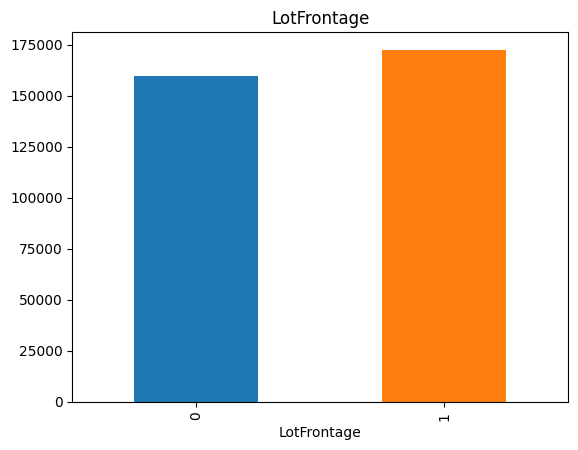

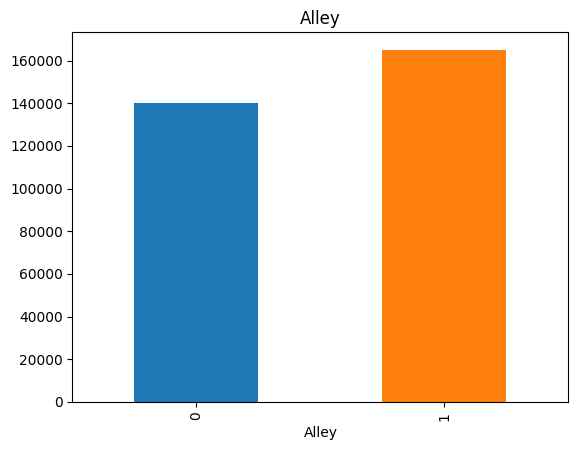

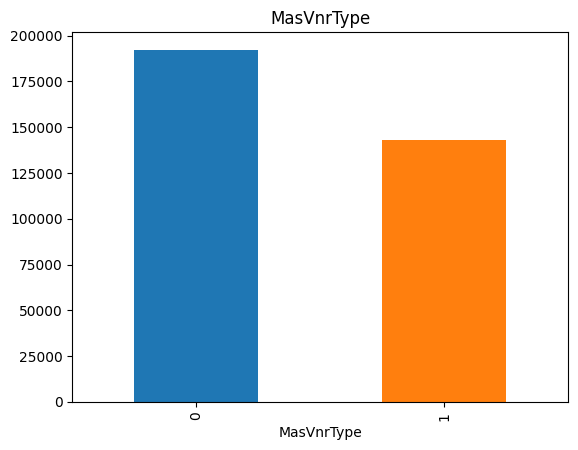

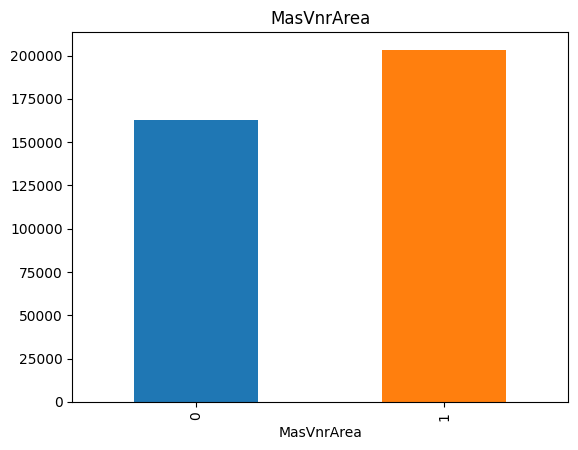

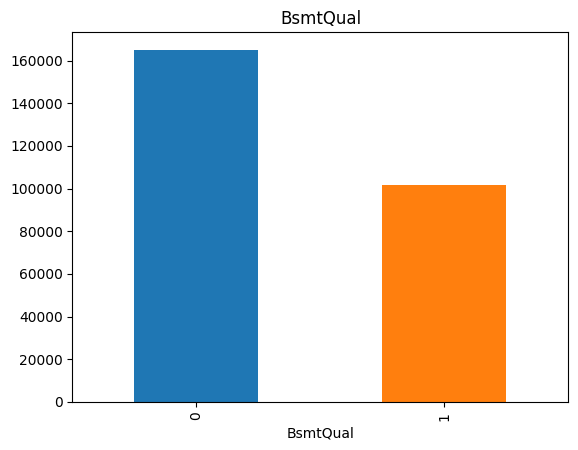

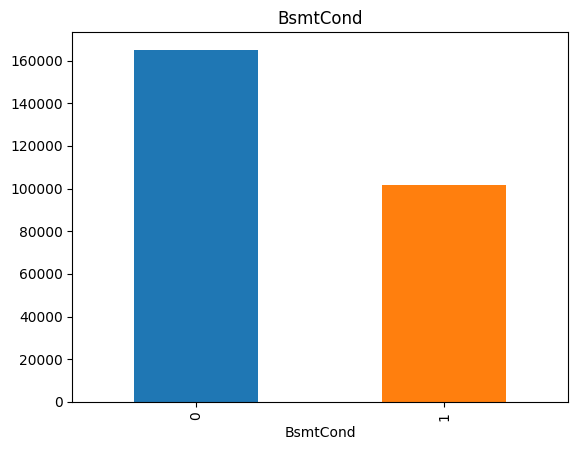

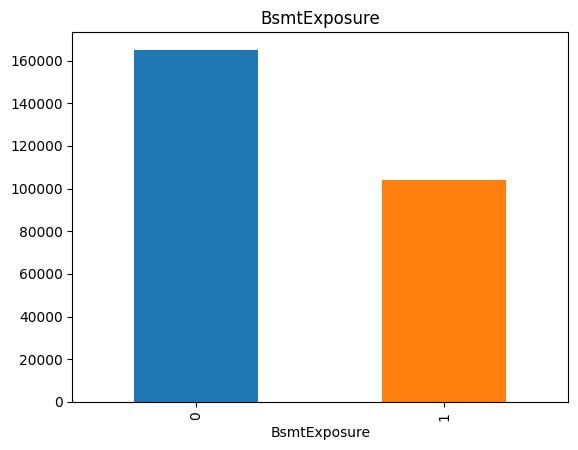

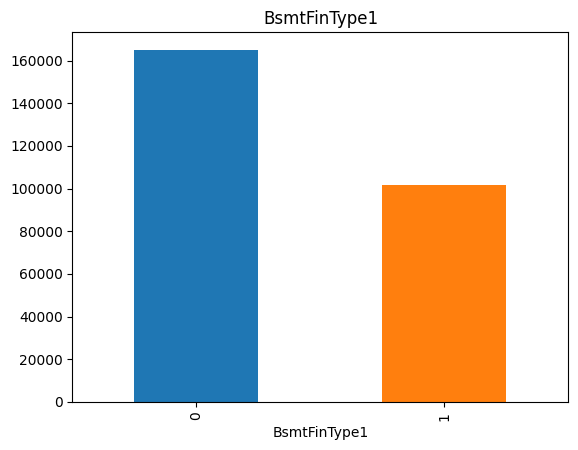

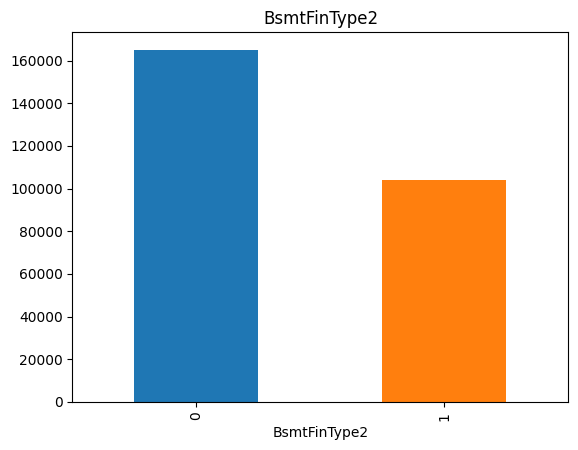

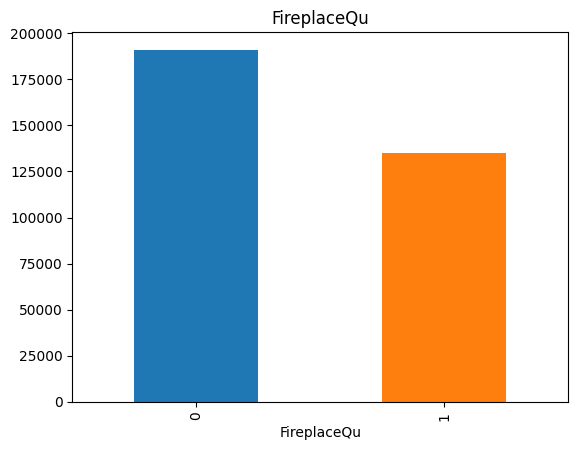

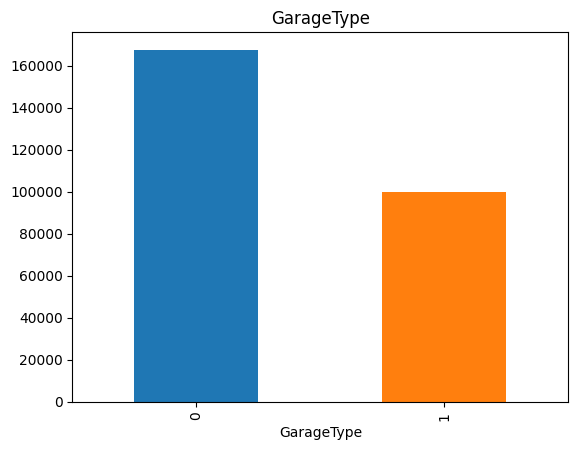

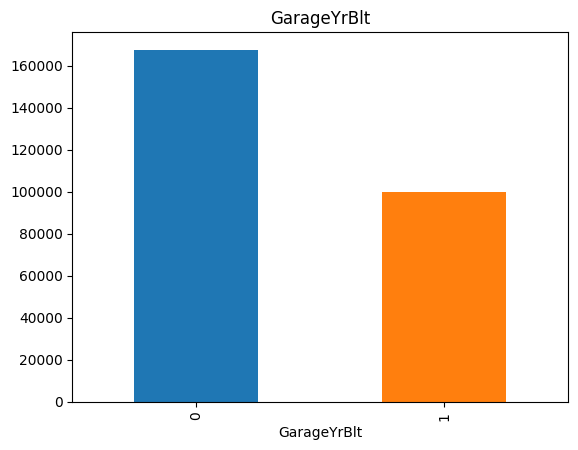

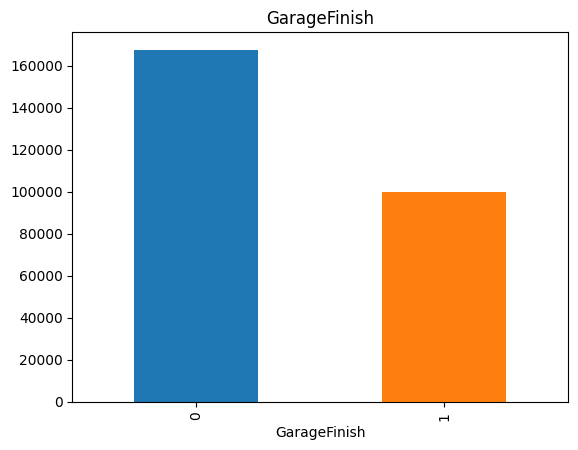

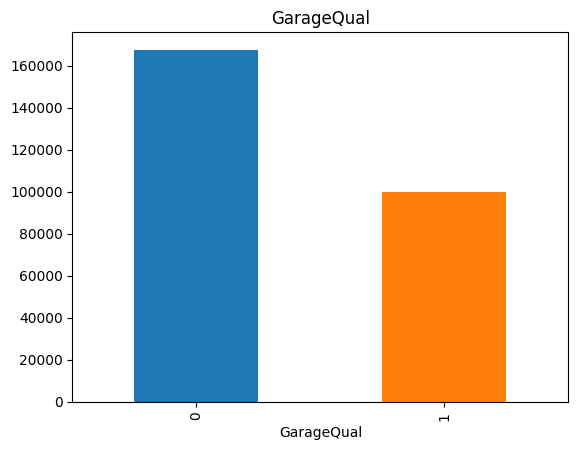

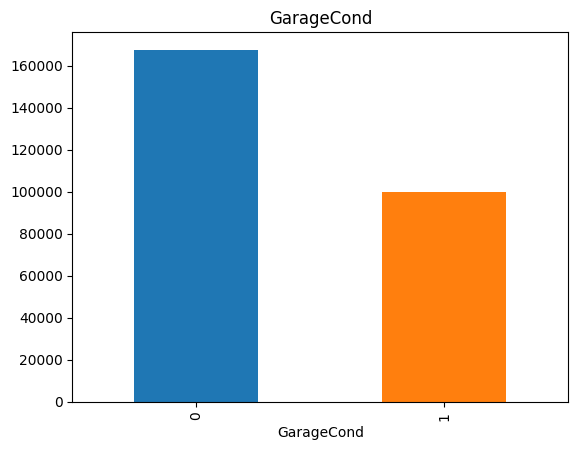

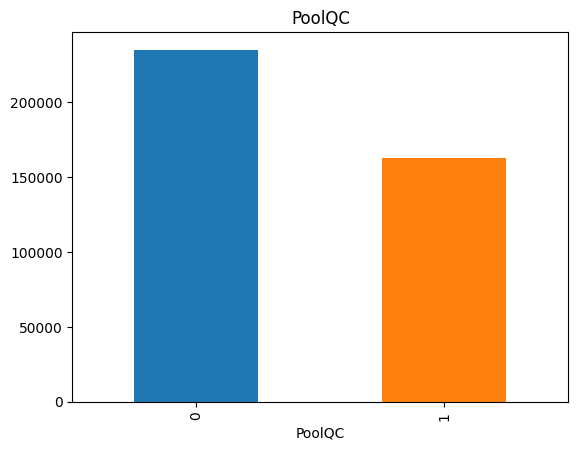

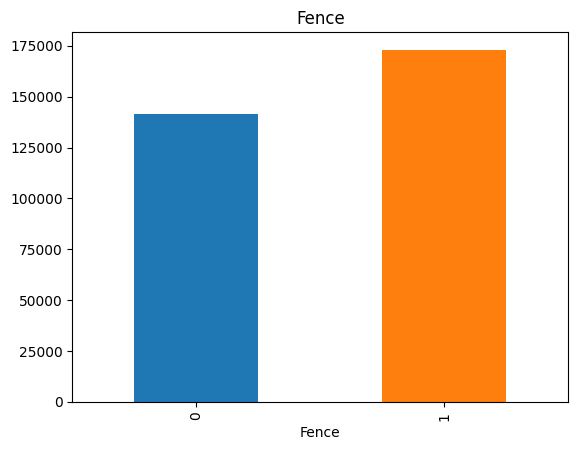

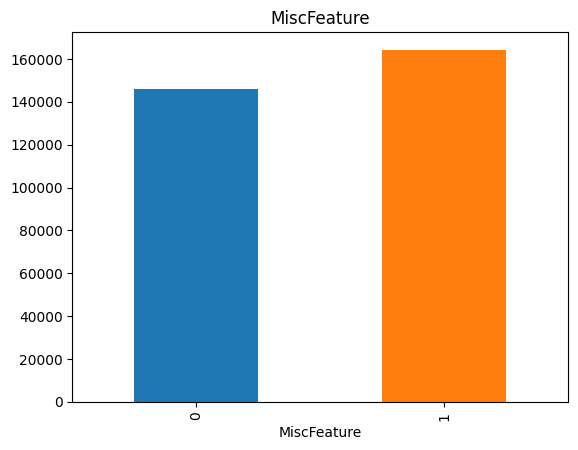

In [5]:
for feature in features_with_na:
    data = dataset.copy()
    
    # indicator variable: 1 if missing, 0 otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    # np.where(condition , value if true , value if false) like ternary operator

    # median SalePrice where info is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar(color =colors)
    plt.title(feature)
    plt.show()

Relation b/w missing values and dependent variable clearly shows we need to replace these nan values with something meaningful which we'll do in Feature Engineering section.


In [6]:
# n=len(dataset.Id)
# print(f"Id of Houses {n}") 
# Another way too write this
print("Id of Houses {}".format(len(dataset.Id)))


Id of Houses 1460


In [7]:
# print(dataset)

## Numerical Variables


In [8]:
# list of numerical values
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes!='object'] 
print(f"No of numerical variables : {len(numerical_features)}")
dataset[numerical_features].head()

No of numerical variables : 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


## Temporal variables (Eg Datetime Variables)
In the above dataset we have 4 yr variables. we have to extract info from the datetime variables like no of years or no of days . 
Eg the time difference between the year house was built and the year house was sold.
we'll perform this in feature engineering.

In [9]:
year_feature=[feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [10]:
# Exploring the content of these variables

In [11]:
for feature in year_feature:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price Vs Year Sold')

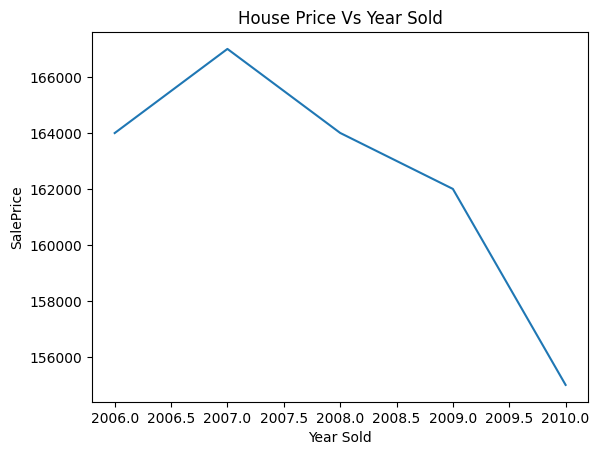

In [12]:
# Analyzing the temporal datetime variables
# checking if there is relation between year the house is sold and the sales price
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('SalePrice')
plt.title('House Price Vs Year Sold')

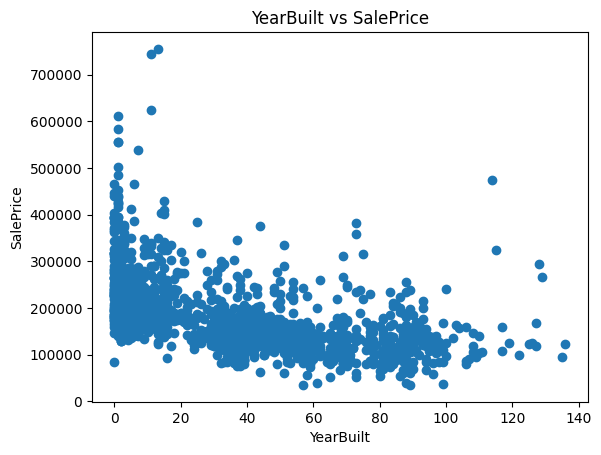

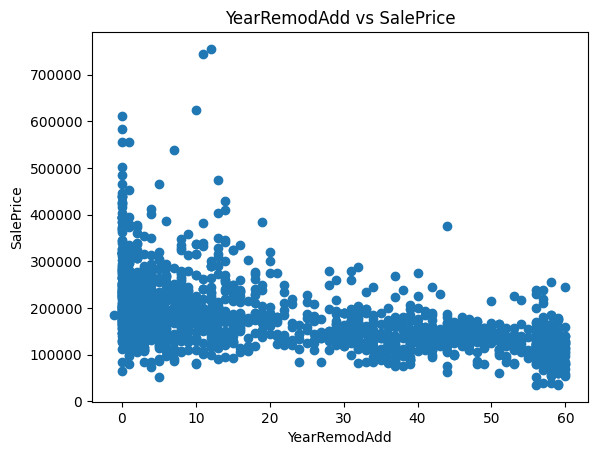

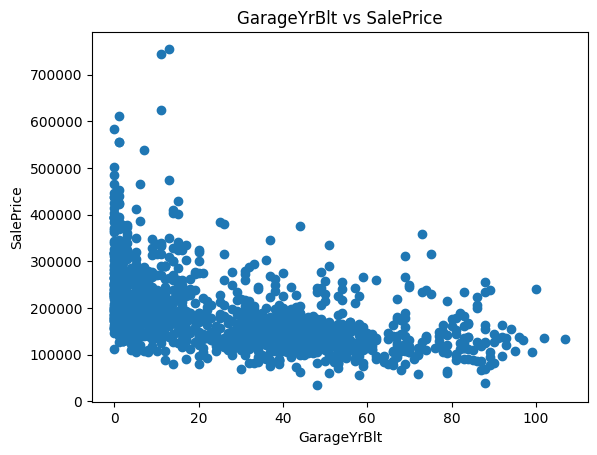

In [13]:
# Comparing all years feature with SalePrice
for feature in year_feature:
    if feature!='YrSold':
        data = dataset.copy()
        # we'll capture the difference between year variable and year the house was sold for 
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.title(f"{feature} vs SalePrice")
        plt.show() 

In [14]:
# Numerical values are of 2 types -
# 1) continues variables
# 2) discrete variables - fixed set of integer values

discrete_features=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print(f"Discrete Variable count : {len(discrete_features)}")

Discrete Variable count : 17


In [15]:
# printing no of values each discrete feature has 
for i in discrete_features:
    print(i ,"=",len(dataset[i].unique()), ) 

MSSubClass = 15
OverallQual = 10
OverallCond = 9
LowQualFinSF = 24
BsmtFullBath = 4
BsmtHalfBath = 3
FullBath = 4
HalfBath = 3
BedroomAbvGr = 8
KitchenAbvGr = 4
TotRmsAbvGrd = 12
Fireplaces = 4
GarageCars = 5
3SsnPorch = 20
PoolArea = 8
MiscVal = 21
MoSold = 12


In [16]:
dataset[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


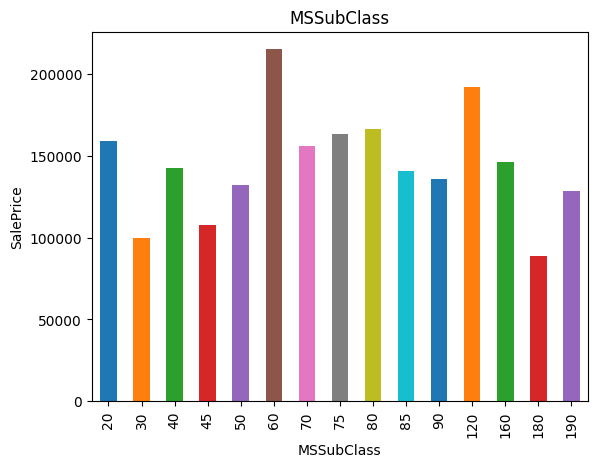

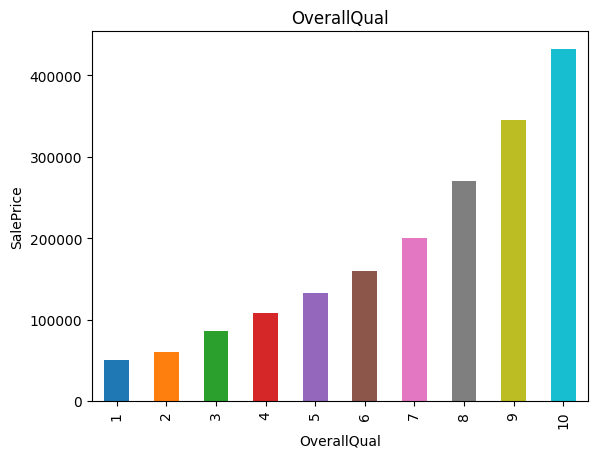

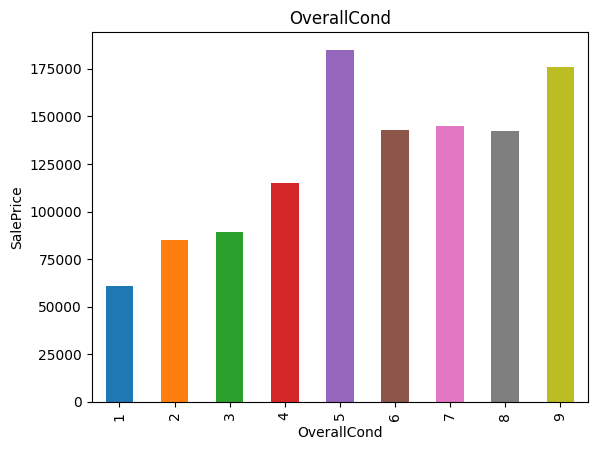

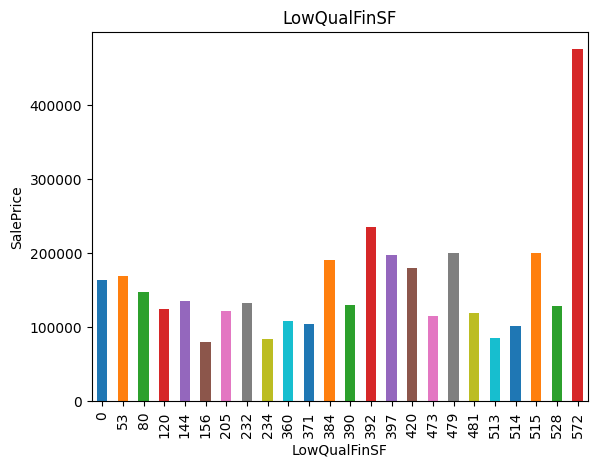

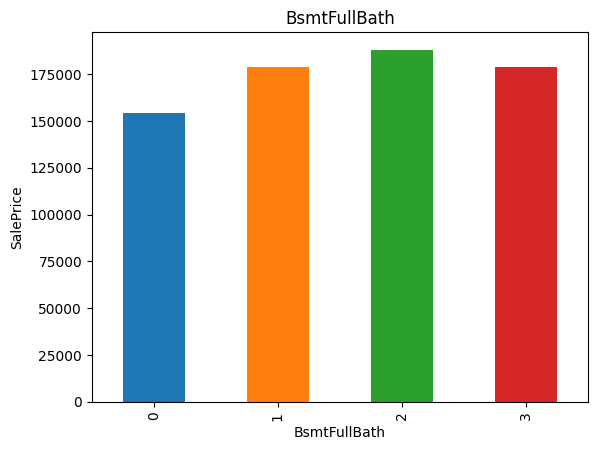

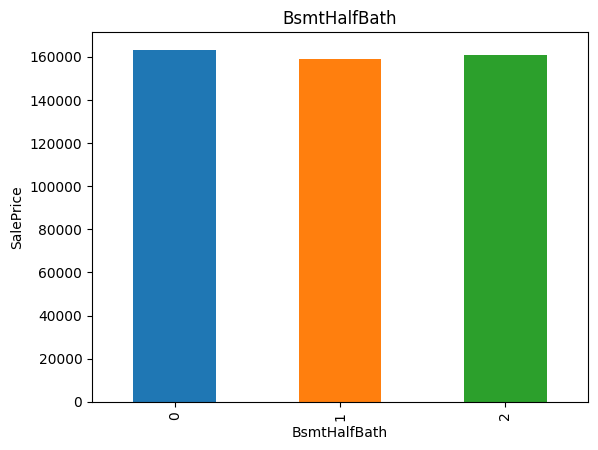

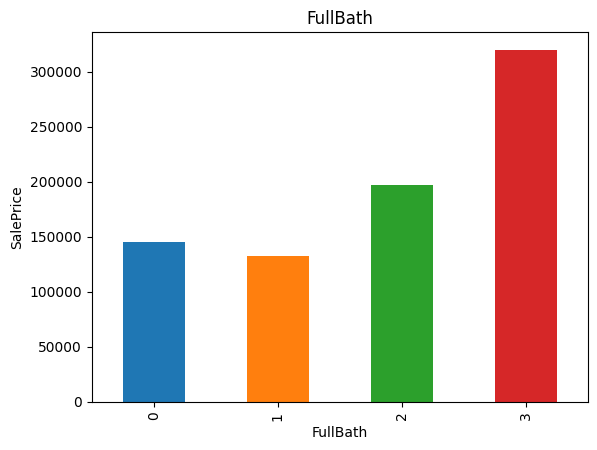

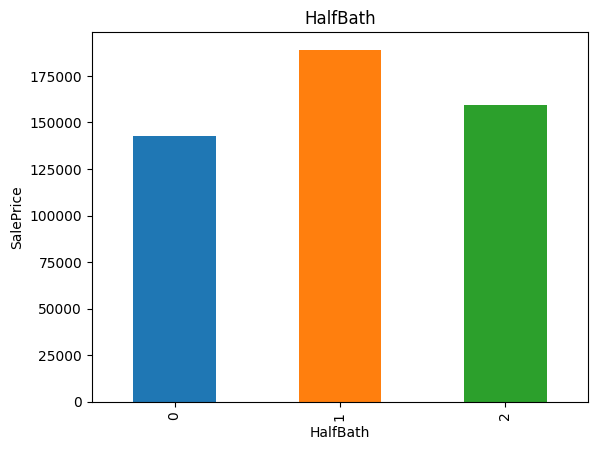

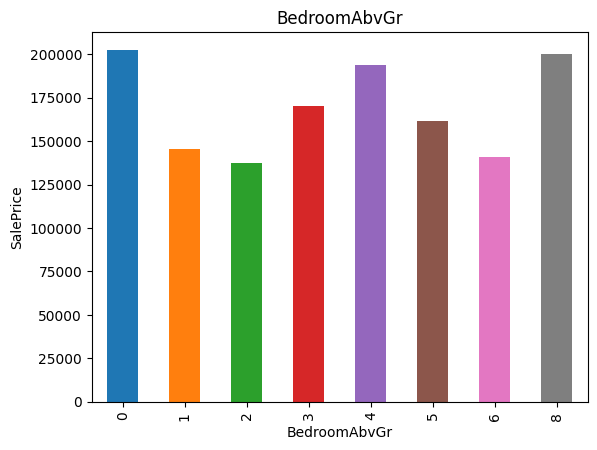

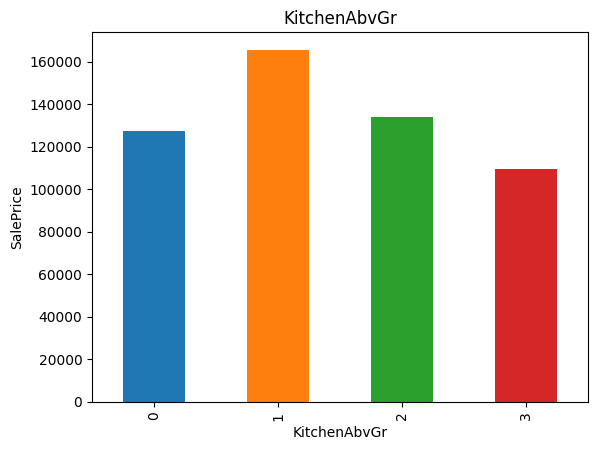

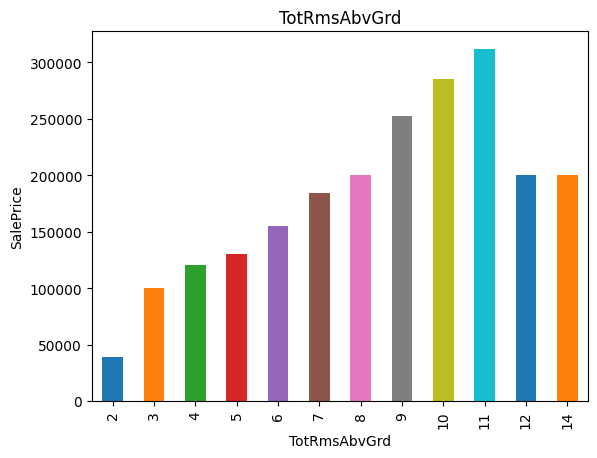

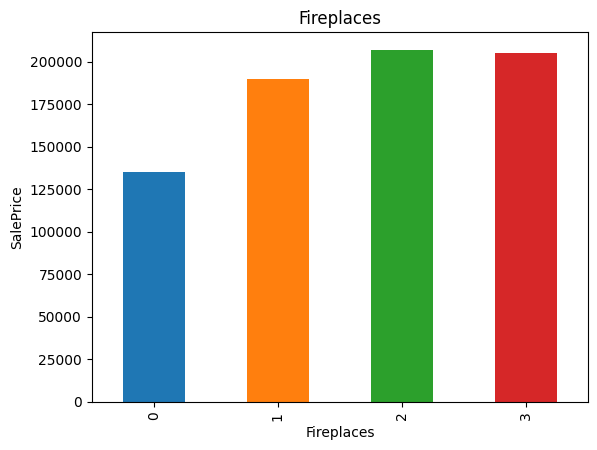

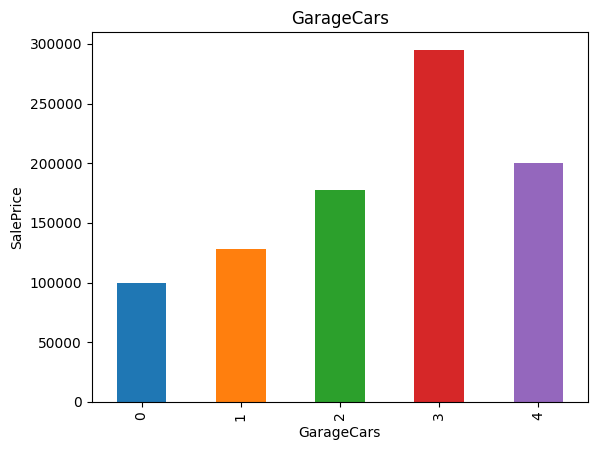

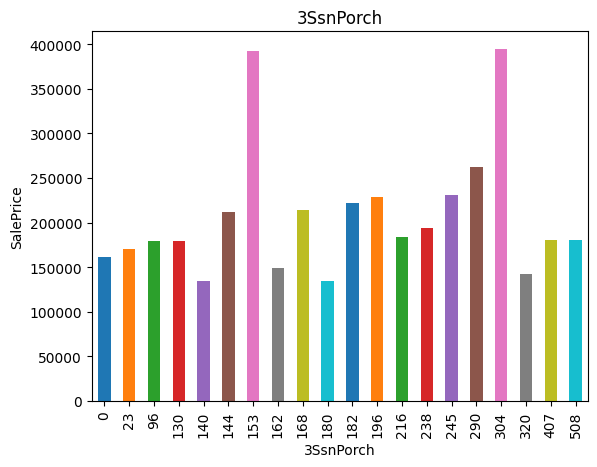

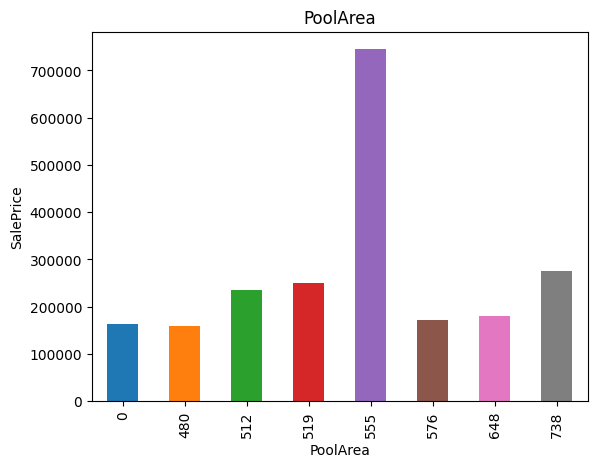

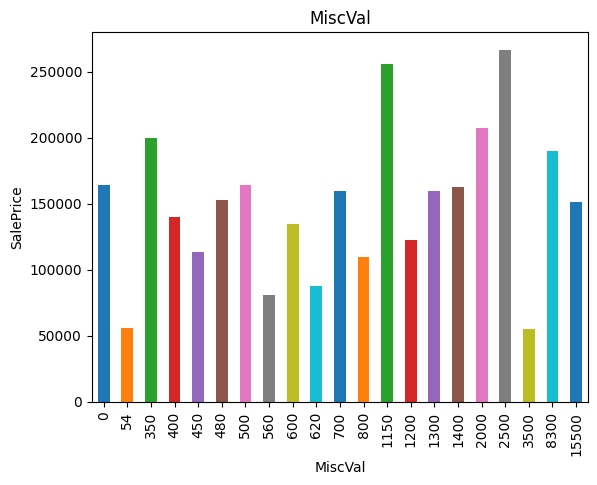

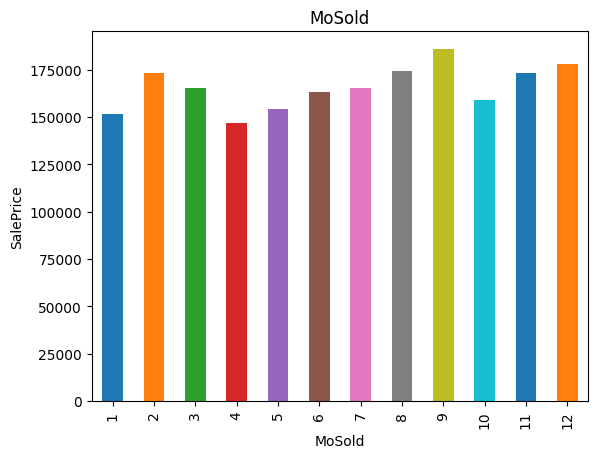

In [17]:
# Lets find the relationship between them and SalePrice
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
          "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
          "#bcbd22", "#17becf"]
for feature in discrete_features:
    data = dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=colors)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [18]:
# exponential rise - monotonic relationship

## Continuous Variable

continuous_features=[feature for feature in numerical_features if feature not in discrete_features+year_feature+['Id']]
print(f"No of Continuous features:{len(continuous_features)} ")

No of Continuous features:16 


In [19]:
for i in continuous_features:
    print(i)

LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
ScreenPorch
SalePrice


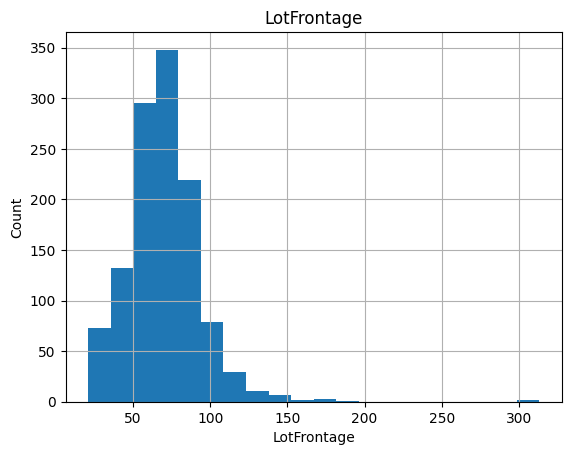

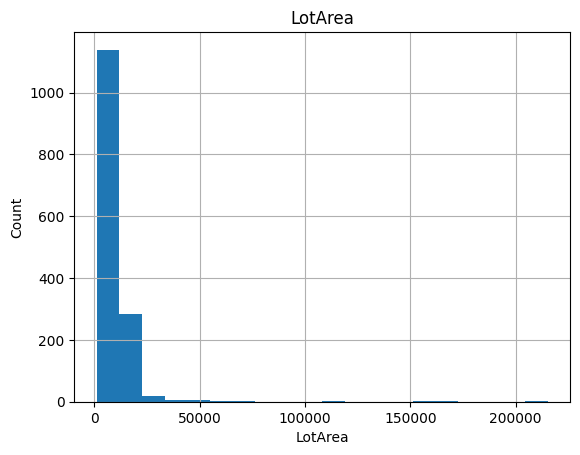

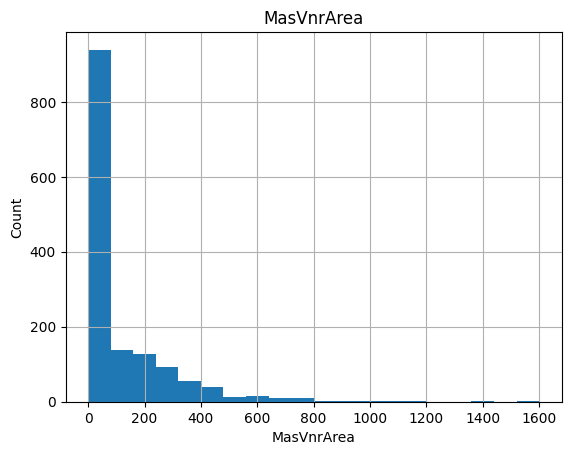

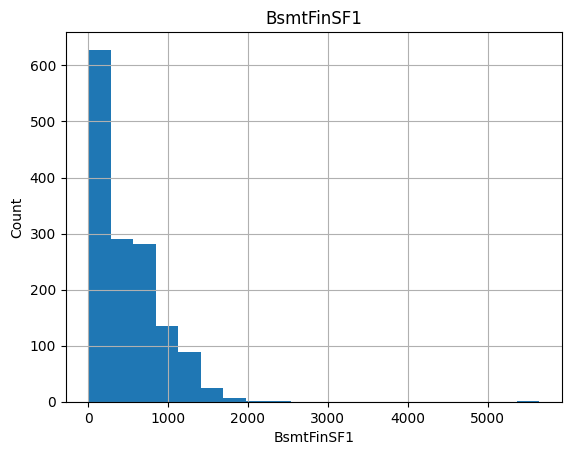

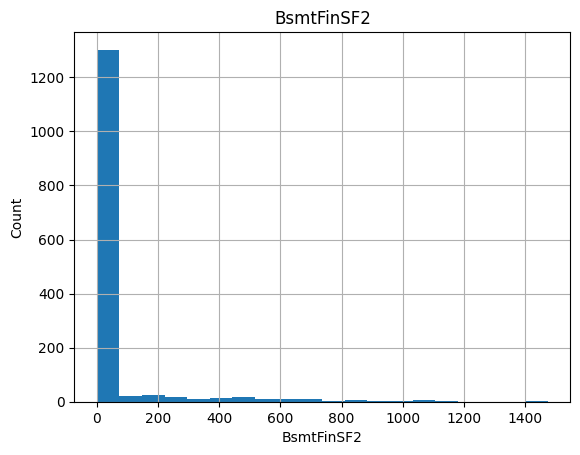

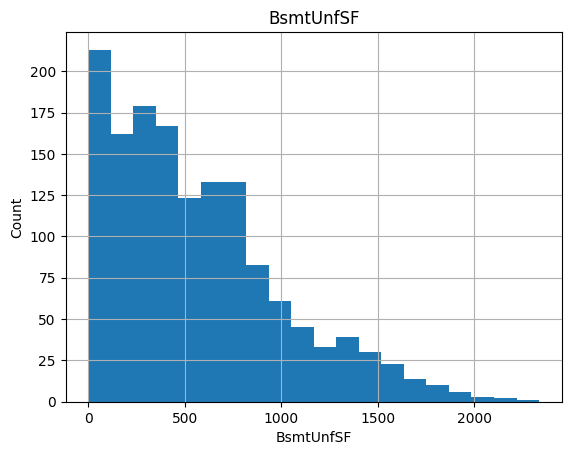

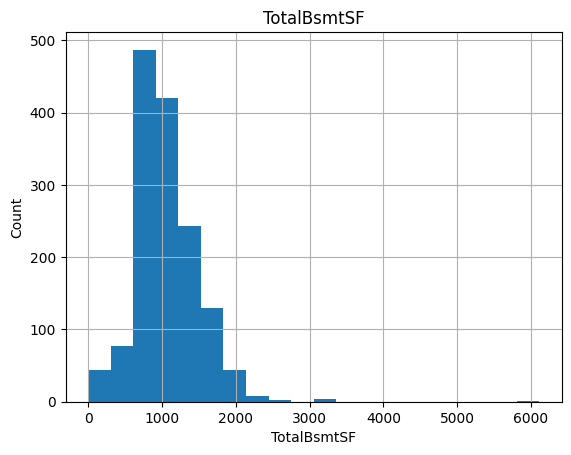

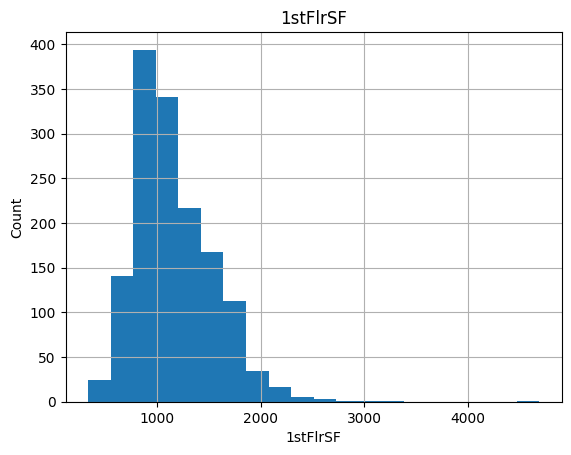

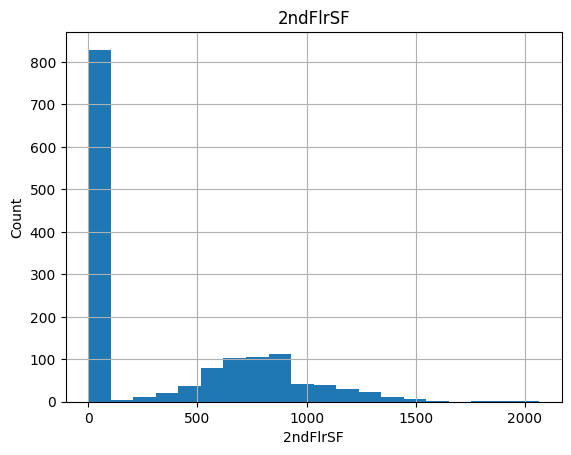

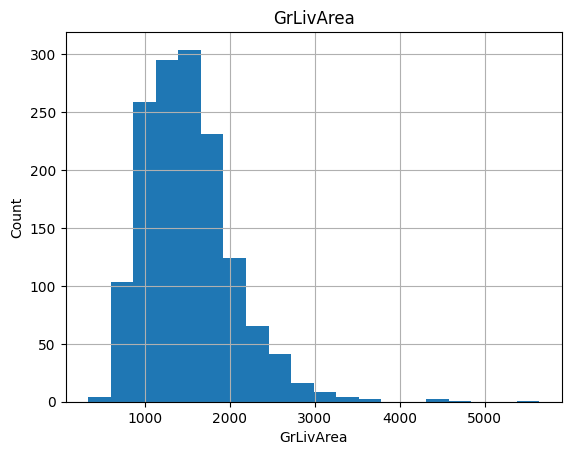

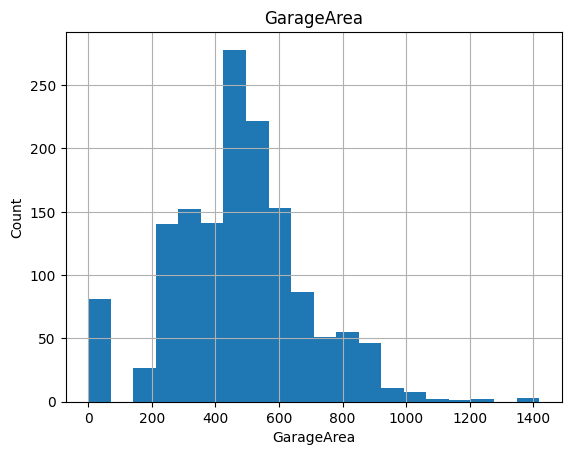

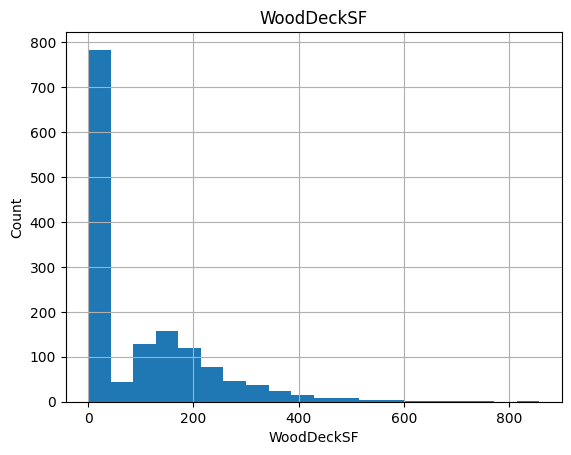

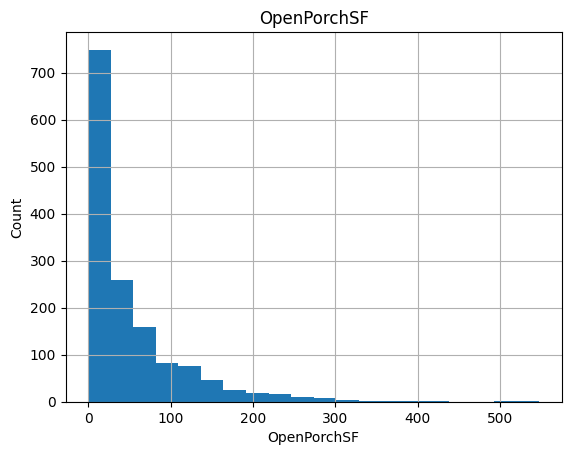

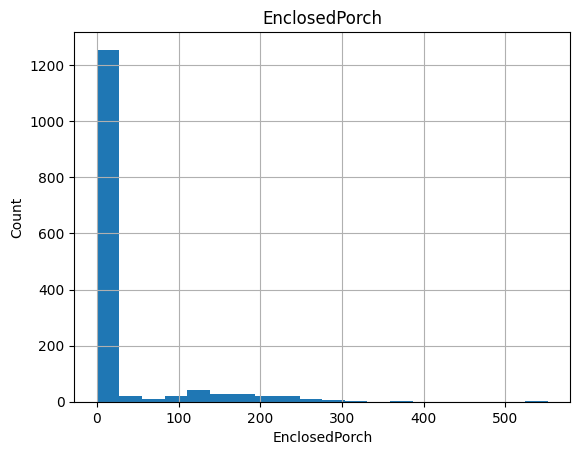

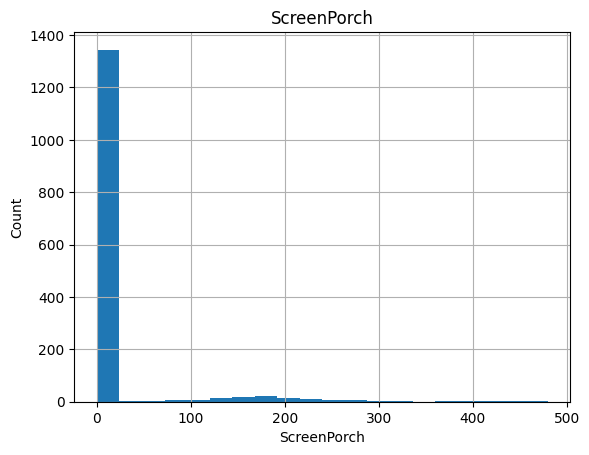

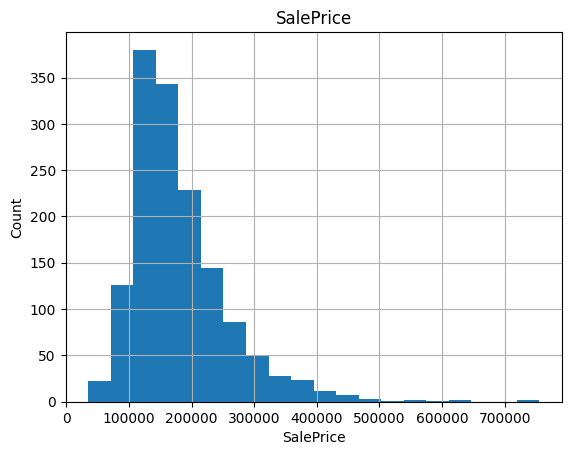

In [20]:
# Analyzing the continuous features by creating histogram to understand the distribution

for feature in continuous_features:
    data = dataset.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## Part 2

### Logarithmin Transformation


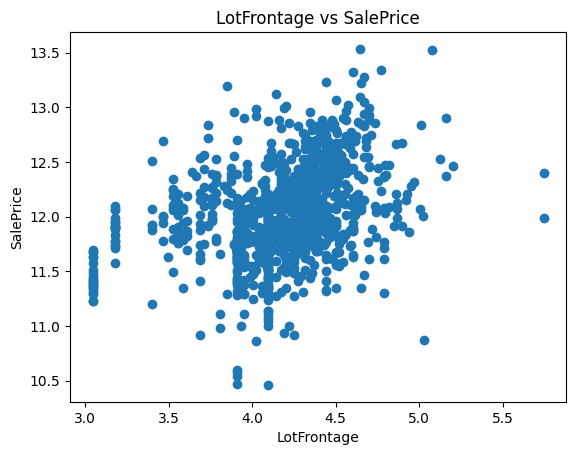

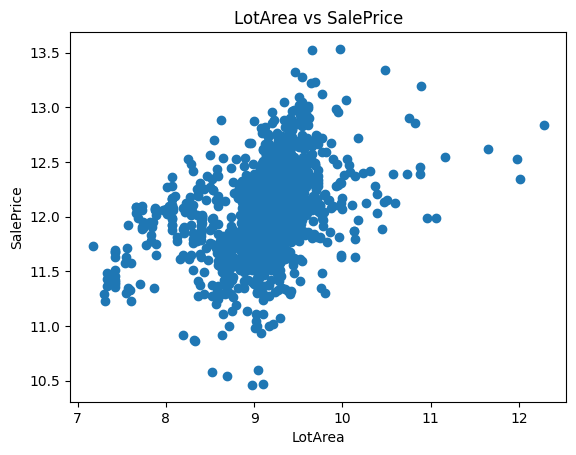

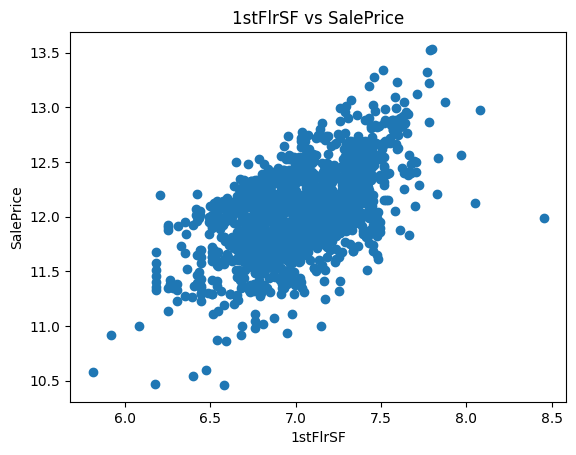

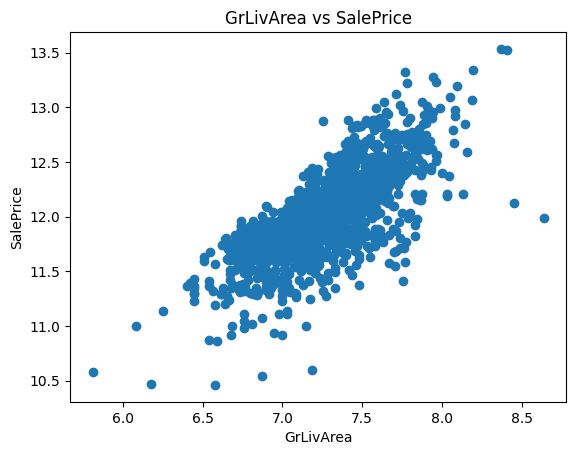

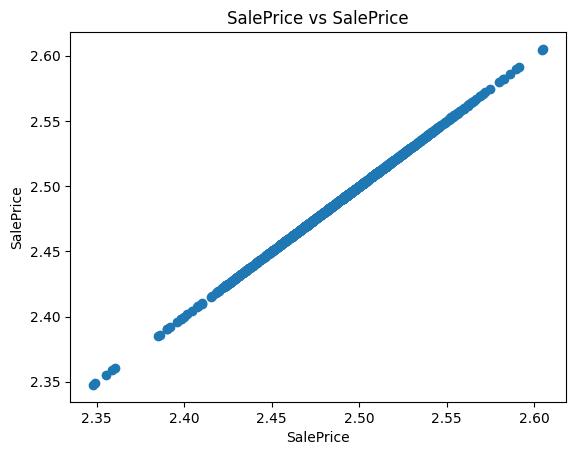

In [21]:
for feature in continuous_features:
    data = dataset.copy()
    if 0 in data[feature].unique(): # log(0) = - infinity = gotta skip this value
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(f'{feature} vs SalePrice')
        plt.show()

## Outliers 
values outside range or on the periphery , extremes...

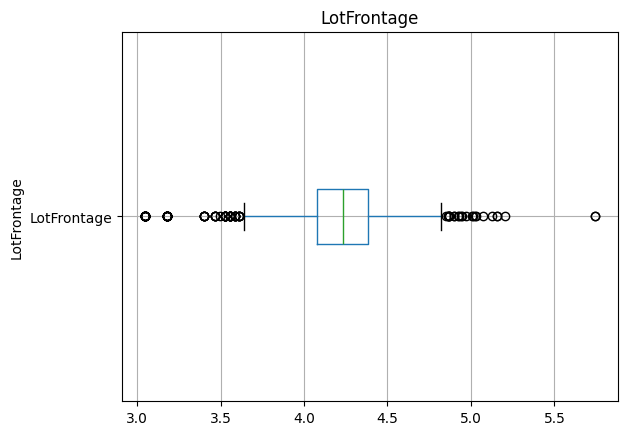

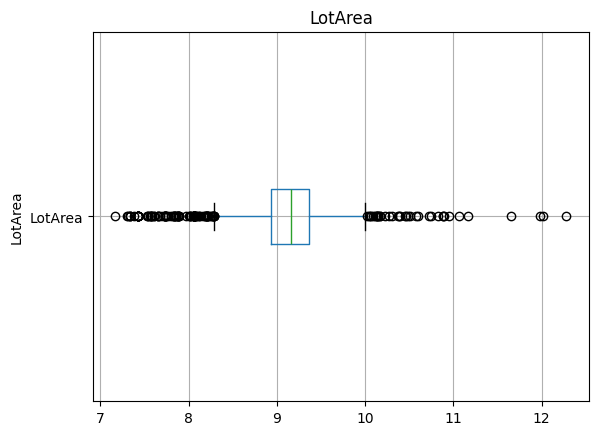

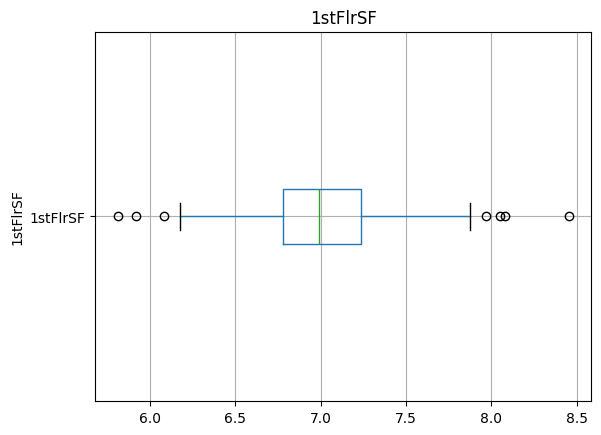

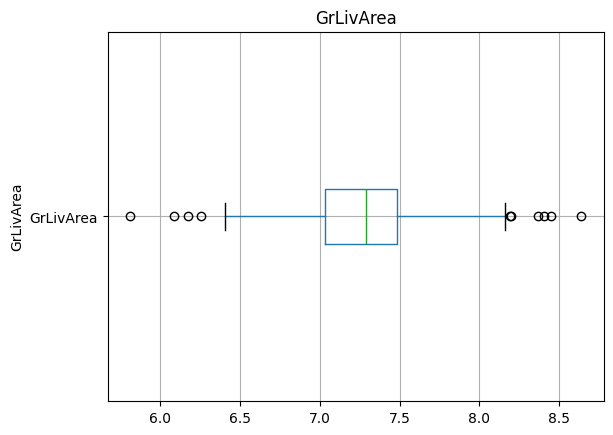

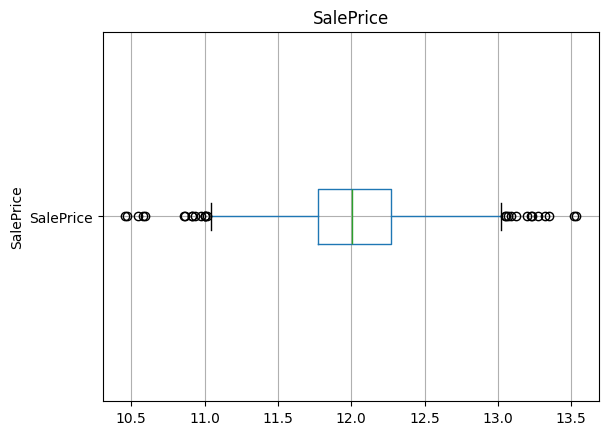

In [22]:
for feature in continuous_features:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]= np.log(data[feature])
        data.boxplot(column=feature,vert=False)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## Categorical Variables

In [23]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='object']
print(len(categorical_features))
# for i in categorical_variables:
#     print(i)

43


In [24]:
for feature in categorical_features:
    print(f"Feature {feature} containes {len(dataset[feature].unique())} values")
    # cardinality in a categorical feature -> unique values

Feature MSZoning containes 5 values
Feature Street containes 2 values
Feature Alley containes 3 values
Feature LotShape containes 4 values
Feature LandContour containes 4 values
Feature Utilities containes 2 values
Feature LotConfig containes 5 values
Feature LandSlope containes 3 values
Feature Neighborhood containes 25 values
Feature Condition1 containes 9 values
Feature Condition2 containes 8 values
Feature BldgType containes 5 values
Feature HouseStyle containes 8 values
Feature RoofStyle containes 6 values
Feature RoofMatl containes 8 values
Feature Exterior1st containes 15 values
Feature Exterior2nd containes 16 values
Feature MasVnrType containes 4 values
Feature ExterQual containes 4 values
Feature ExterCond containes 5 values
Feature Foundation containes 6 values
Feature BsmtQual containes 5 values
Feature BsmtCond containes 5 values
Feature BsmtExposure containes 5 values
Feature BsmtFinType1 containes 7 values
Feature BsmtFinType2 containes 7 values
Feature Heating containes

## Relation b/w categorical feature and dependent feature

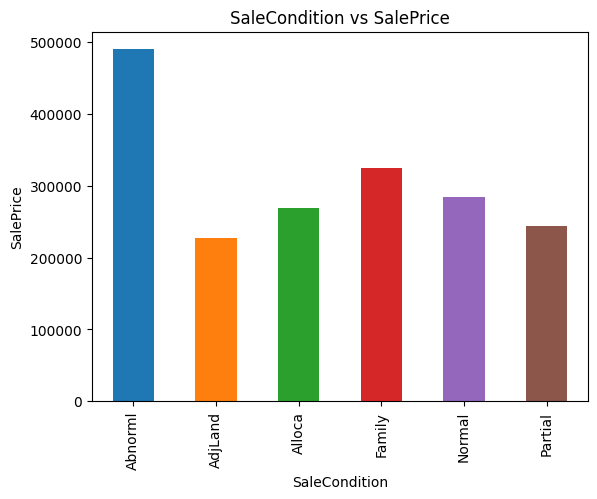

In [25]:
for feature in categorical_features:
    data = dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color = colors)
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(f"{feature} vs SalePrice")